In [1]:
import pydicom

file = pydicom.dcmread('sample/sample.dcm')

print(file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 174
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.8120.100.20081117.1165844.2001001001
(0002,0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1545.1
-------------------------------------------------
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.392.200036.8120.100.20081117.1165844.2001001001
(0008,0020) Study Date                          DA: '20081117'
(0008,0021) Series Date              

In [17]:
print(file.dir())

['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'DeviceSerialNumber', 'DistanceSourceToDetector', 'Exposure', 'ExposureTime', 'HighBit', 'ImageType', 'InstanceNumber', 'InstitutionName', 'KVP', 'Laterality', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OperatorsName', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientOrientation', 'PatientPosition', 'PatientSex', 'PatientSize', 'PatientWeight', 'PhotometricInterpretation', 'PixelData', 'PixelIntensityRelationship', 'PixelRepresentation', 'PixelSpacing', 'RadiationSetting', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SeriesDate', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SeriesTime', 'SoftwareVersions', 'StationName', 'StudyDate', 'StudyDescription', 'StudyID', 'StudyInstanceUID', 'StudyTime', 'ViewPosition', 'WindowCenter', 'WindowWidth', 'X

In [2]:
import pydicom

file = pydicom.dcmread('sample/sample.dcm')

print(file.PatientName)   # keywordで指定
print(file.data_element('PatientName'))  # タグで指定
print(file[0x0010, 0x0010])  # タグで指定
print(file[0x00100010].keyword)
# 'PatientName'とコンソール出力される

AKIHABARA^TARO
(0010,0010) Patient's Name                      PN: 'AKIHABARA^TARO'
(0010,0010) Patient's Name                      PN: 'AKIHABARA^TARO'
PatientName


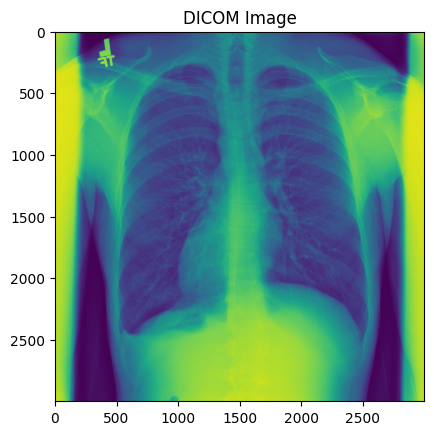

In [11]:
import pydicom
import matplotlib.pyplot as plt

file = pydicom.dcmread('sample/sample.dcm')
img = file.pixel_array
plt.imshow(img)
plt.title('DICOM Image')
plt.show()

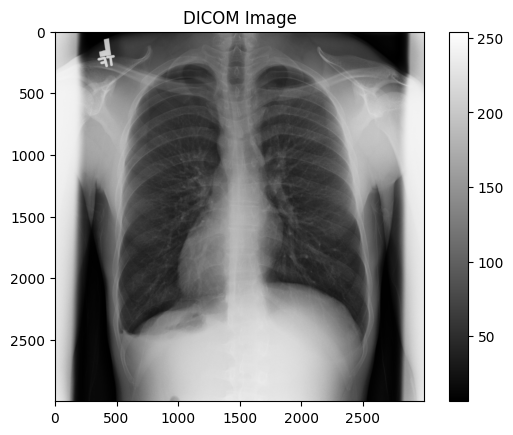

In [ ]:
import pydicom
import matplotlib.pyplot as plt


file = pydicom.dcmread('sample/sample.dcm')
wc = file.WindowCenter
ww = file.WindowWidth
img = file.pixel_array

#ウィンドウ処理
window_max = wc + ww /2
window_min = wc - ww /2
img = 255*(img-window_min)/(window_max - window_min)
img[img > 255] = 255
img[img < 0] = 0

# 画像を表示
plt.imshow(img)
plt.imshow(img, cmap='gray')  # グレースケールで表示
plt.title('DICOM Image')
plt.colorbar()  # カラーバーを追加
plt.show()      # 表示を実行

In [12]:
print(f"画像サイズ: {file.Rows} x {file.Columns}")
print(f"ピクセル数: {file.Rows * file.Columns}")

# ビット深度
print(f"ビット深度: {file.BitsAllocated} bit")
print(f"実際のビット: {file.BitsStored} bit")

# ピクセル間隔（mm）
print(f"ピクセル間隔: {file.PixelSpacing} mm")

画像サイズ: 3000 x 3000
ピクセル数: 9000000
ビット深度: 16 bit
実際のビット: 12 bit
ピクセル間隔: [0.143, 0.143] mm


In [13]:
# ウィンドウ設定
print(f"ウィンドウセンター: {file.WindowCenter}")
print(f"ウィンドウ幅: {file.WindowWidth}")

# 画像の前処理
img = file.pixel_array
print(f"画像の値の範囲: {img.min()} ~ {img.max()}")

ウィンドウセンター: 2048
ウィンドウ幅: 4095
画像の値の範囲: 104 ~ 4081


In [14]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

def analyze_dicom_metadata(dicom_file):
    """DICOMファイルのメタデータを体系的に分析"""
    
    print("=== DICOMメタデータ分析 ===\n")
    
    # 1. ファイル情報
    print("ファイル情報")
    print(f"Transfer Syntax: {dicom_file.file_meta.TransferSyntaxUID}")
    print(f"SOP Class: {dicom_file.SOPClassUID}")
    print()
    
    # 2. 患者情報
    print("患者情報")
    print(f"患者名: {dicom_file.PatientName}")
    print(f"患者ID: {dicom_file.PatientID}")
    print(f"生年月日: {dicom_file.PatientBirthDate}")
    print(f"性別: {dicom_file.PatientSex}")
    print()
    
    # 3. 検査情報
    print("検査情報")
    print(f"検査日: {dicom_file.StudyDate}")
    print(f"検査時間: {dicom_file.StudyTime}")
    print(f"検査ID: {dicom_file.StudyID}")
    print(f"検査説明: {dicom_file.StudyDescription}")
    print()
    
    # 4. 画像技術情報
    print("画像技術情報")
    print(f"モダリティ: {dicom_file.Modality}")
    print(f"KVP: {dicom_file.KVP} kV")
    print(f"露出時間: {dicom_file.ExposureTime} ms")
    print(f"管電流: {dicom_file.XRayTubeCurrent} mA")
    print()
    
    # 5. 画像情報
    print("画像情報")
    print(f"画像サイズ: {dicom_file.Rows} x {dicom_file.Columns}")
    print(f"ビット深度: {dicom_file.BitsAllocated} bit")
    print(f"ピクセル間隔: {dicom_file.PixelSpacing} mm")
    print(f"フォトメトリック解釈: {dicom_file.PhotometricInterpretation}")
    print()
    
    # 6. 画像データの統計
    img = dicom_file.pixel_array
    print(" 画像データ統計")
    print(f"最小値: {img.min()}")
    print(f"最大値: {img.max()}")
    print(f"平均値: {img.mean():.2f}")
    print(f"標準偏差: {img.std():.2f}")
    print(f"データ型: {img.dtype}")

# 使用例
filepath = 'sample/sample.dcm'
file = pydicom.dcmread(filepath)
analyze_dicom_metadata(file)

=== DICOMメタデータ分析 ===

ファイル情報
Transfer Syntax: 1.2.840.10008.1.2.4.70
SOP Class: 1.2.840.10008.5.1.4.1.1.1

患者情報
患者名: AKIHABARA^TARO
患者ID: 2008123456
生年月日: 19790201
性別: M

検査情報
検査日: 20081117
検査時間: 165844.000
検査ID: 58
検査説明: 

画像技術情報
モダリティ: CR
KVP: 125 kV
露出時間: 500 ms
管電流: 100 mA

画像情報
画像サイズ: 3000 x 3000
ビット深度: 16 bit
ピクセル間隔: [0.143, 0.143] mm
フォトメトリック解釈: MONOCHROME2

 画像データ統計
最小値: 104
最大値: 4081
平均値: 1920.84
標準偏差: 1090.75
データ型: uint16


見つかったDICOMファイル数: 1
処理完了: sample.dcm


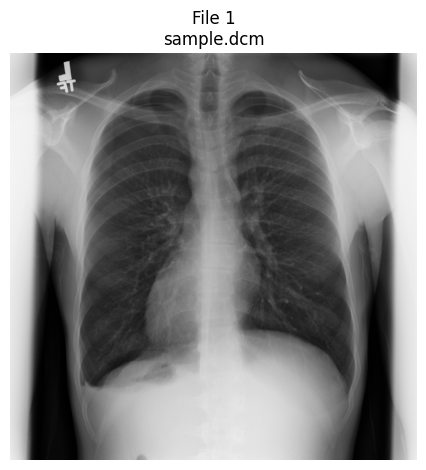

In [16]:
import os
import pydicom
import matplotlib.pyplot as plt
import glob

def display_all_dicom_images(folder_path):
    """指定されたフォルダー内の全DICOMファイルの画像を表示"""
    
    # DICOMファイルを検索
    dicom_files = glob.glob(os.path.join(folder_path, '*.dcm'))
    
    if not dicom_files:
        print(f"'{folder_path}'フォルダーにDICOMファイルが見つかりません")
        return
    
    print(f"見つかったDICOMファイル数: {len(dicom_files)}")
    
    # 各ファイルを処理
    for i, file_path in enumerate(dicom_files):
        try:
            # DICOMファイルを読み込み
            ds = pydicom.dcmread(file_path)
            
            # 画像データを取得
            img = ds.pixel_array
            
            # サブプロットで表示
            plt.subplot(1, len(dicom_files), i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f'File {i+1}\n{os.path.basename(file_path)}')
            plt.axis('off')
            
            print(f"処理完了: {os.path.basename(file_path)}")
            
        except Exception as e:
            print(f"エラー ({file_path}): {e}")
    
    plt.tight_layout()
    plt.show()

# 実行
display_all_dicom_images('sample')